In [1]:
print("Hello")

Hello


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
housing = fetch_california_housing(as_frame=True)

In [5]:
# Features (X) and target (y)
X = housing.data                      # DataFrame of features
y = housing.target.rename("MEDV")     # Median house value (in 100k USD units)

In [6]:
display(X.head())
print(f"Shape of data: {X.shape}")
print("Target sample:", y.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Shape of data: (20640, 8)
Target sample: 0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MEDV, dtype: float64


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (16512, 8), Test shape: (4128, 8)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [9]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.56
R² Score: 0.58


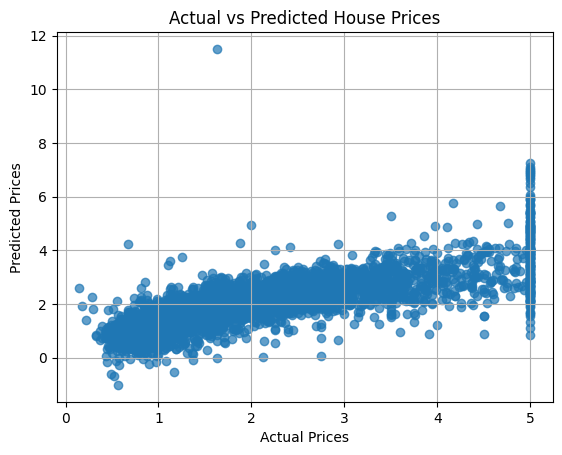

In [10]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

In [11]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
display(coeff_df.sort_values(by="Coefficient", ascending=False))

,Coefficient
AveBedrms,0.783145
MedInc,0.448675
HouseAge,0.009724
Population,-0.000002
AveOccup,-0.003526
AveRooms,-0.123323
Latitude,-0.419792
Longitude,-0.433708
